<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/NLP_COMP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some non linearility is here becaue of constant reloading of saved models and subsequent experimentation



In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Thirdsem/TimeSeries/ner_hindi_train.txt',sep='\t',names=['Name','Entity'])

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


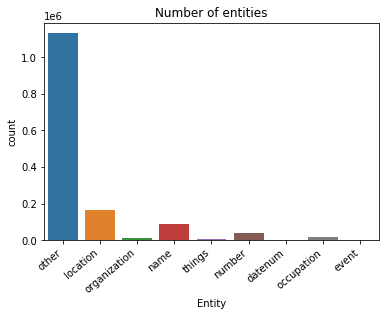

In [ ]:
ax = sns.countplot(df.Entity,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.figure(figsize=(8,8))
#img=
plt.xlabel('Entity')
plt.title('Number of entities')
plt.savefig('entity_number.png')

In [ ]:
Test_dict=np.load('/content/drive/MyDrive/Thirdsem/TimeSeries/dict.npy',allow_pickle=True)

In [ ]:
w2n = np.load('/content/drive/MyDrive/Thirdsem/TimeSeries/dict.npy',allow_pickle=True)[()]

In [ ]:
new_w2i = {**w2n, **{'': 0}}

In [ ]:
new_w2i['1986']

53436

In [ ]:
X_ = [[new_w2i[w] for w in s] for s in NS]

In [ ]:
X = pad_sequences(maxlen=609, sequences=X_, padding="post",value=53436)

In [ ]:
data=df.fillna('limit')

In [ ]:
df2=pd.read_csv('/content/ner_hindi_test .csv')

In [ ]:
df2.head()

,ID,Words
0,NER_0001,उनके
1,NER_0002,माता
2,NER_0003,-
3,NER_0004,पिता
4,NER_0005,तथा


In [ ]:
df2.count

<bound method DataFrame.count of               ID    Words
0       NER_0001     उनके
1       NER_0002     माता
2       NER_0003        -
3       NER_0004     पिता
4       NER_0005      तथा
...          ...      ...
12660  NER_12661       के
12661  NER_12662    सदस्य
12662  NER_12663      हैं
12663  NER_12664        .
12664  NER_12665  newline

[12665 rows x 2 columns]>

In [ ]:
import numpy as np

Conversion of columns into a single large string and the subsequent representation by splitting it so that the sentences are split as per the given parametes

In [ ]:
ES=data.Entity.str.cat(sep=' ') #convert entire column into single string

In [ ]:
ES=ES.split('limit')    #seperate into sentences

In [ ]:
ES=[s.strip() for s in ES]       #remove the first and the last space

In [ ]:
ES=[s.split(' ') for s in ES]     #separate each sentence into a word

In [ ]:
ES[0]

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'location',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other']

In [ ]:
NS=data.Name.str.cat(sep=' ')
NS=NS.split('newline')
NS=[s.strip() for s in NS]
NS=[s.split(' ') for s in NS]
len(NS)

75884

In [ ]:
words = list(set(data["Name"].values))
#words.append("ENDPAD")

In [ ]:
words_=list(set(df2["Words"].values))

In [ ]:
len(words_)

3402

In [ ]:
w=np.concatenate([words,words_])

In [ ]:
len(w)

91173

In [ ]:
len(words)

87771

In [ ]:
n_words = len(w); n_words

91173

In [ ]:
tags = list(set(data["Entity"].values))

In [ ]:
n_tags = len(tags); n_tags

10

In [ ]:
tags

['event',
 'name',
 'occupation',
 'location',
 'limit',
 'other',
 'organization',
 'datenum',
 'number',
 'things']

In [ ]:
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
tag2idx

{'datenum': 7,
 'event': 0,
 'limit': 4,
 'location': 3,
 'name': 1,
 'number': 8,
 'occupation': 2,
 'organization': 6,
 'other': 5,
 'things': 9}

Tagging words and Entities based on uniqueness of word number mapping

In [ ]:
word2idx = {w: i for i, w in enumerate(w)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
tag2idx

{'datenum': 6,
 'event': 5,
 'limit': 3,
 'location': 7,
 'name': 0,
 'number': 1,
 'occupation': 2,
 'organization': 9,
 'other': 4,
 'things': 8}

In [ ]:
y = [[new_t2i_[w] for w in s] for s in ES]

In [ ]:
y = pad_sequences(maxlen=609, sequences=y, padding="post", value=1)

In [ ]:
word2idx['1986']

53436

In [ ]:
new_w2i = {**word2idx, **{'': 0}}

In [ ]:
new_t2i={**tag2idx,**{'t':9}}

In [ ]:
new_t2i_={**tag2idx,**{'':3}}

In [ ]:
maxlen = max([len(s) for s in NS])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 609


In [ ]:
X = [[new_w2i[w] for w in s] for s in NS]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
new_t2i_={'': 0,
 'datenum': 6,
 'event': 5,
 'limit': 3,
 'location': 7,
 'name': 0,
 'number': 1,
 'occupation': 2,
 'organization': 9,
 'other': 4,
 'things': 8}

In [ ]:
X = pad_sequences(maxlen=609, sequences=X, padding="post",value=88696)

In [ ]:
y = [[new_t2i_[w] for w in s] for s in ES]

In [ ]:
y_trial=y[75000:75883]

In [ ]:
len(y_trial)

883

In [ ]:
y_label=np.hstack(y_trial)
len(y_label)

16557

In [ ]:
y_trial[10]

[4, 4, 4, 4, 1, 4, 4, 7, 4, 7, 4, 4, 7, 4, 4, 7, 7, 4, 7, 7, 4, 4, 7, 4, 4]

In [ ]:
new_t2i_

{'': 0,
 'datenum': 6,
 'event': 5,
 'limit': 3,
 'location': 7,
 'name': 0,
 'number': 1,
 'occupation': 2,
 'organization': 9,
 'other': 4,
 'things': 8}

In [ ]:
y = pad_sequences(maxlen=609, sequences=y, padding="post", value=9)

In [ ]:
len(y)

75884

In [ ]:
y.shape

(75884, 609)

In [ ]:
Y_test=y[75000:75883]
X_test=X[75000:75883]

In [ ]:
len(X_test)

883

In [ ]:
mm=load_model('/content/drive/MyDrive/Thirdsem/TimeSeries/NER_Hindi.hdf5')

In [ ]:
met_res=[]
for i in range(0,len(X_test)):
  p = mm.predict(np.array([X_test[i]]))
  p = np.argmax(p, axis=-1)
  met_res.append(p[0][0:len(y_trial[i])])

In [ ]:
met_t=np.hstack(met_res)
len(met_t)

16557

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
CF=confusion_matrix(met_t,y_label)

In [ ]:
img=classification_report(met_t,y_label,output_dict=True,target_names={0:'name',1:'number',2:'occupation',3:'other',4:'event',5:'datenum',6:'location',7:'things',8:'organization'})

In [ ]:
data=pd.DataFrame(img)

In [ ]:
tmp=data.rename(columns={0:'name',1:'number',2:'occupation',3:'other',4:'event',5:'datenum',6:'location',7:'things',8:'organization'})

In [ ]:
tmp

,name,number,occupation,other,event,datenum,location,things,organization,accuracy,macro avg,weighted avg
precision,0.796004,0.940503,0.889571,0.992471,0.903226,0.513514,0.963155,0.717949,0.868966,0.972761,0.842818,0.975343
recall,0.945069,0.947005,0.906250,0.976198,1.000000,0.950000,0.976079,0.965517,0.919708,0.972761,0.953981,0.972761
f1-score,0.864155,0.943743,0.897833,0.984267,0.949153,0.666667,0.969574,0.823529,0.893617,0.972761,0.888060,0.973563
support,801.000000,434.000000,160.000000,13234.000000,28.000000,20.000000,1714.000000,29.000000,137.000000,0.972761,16557.000000,16557.000000


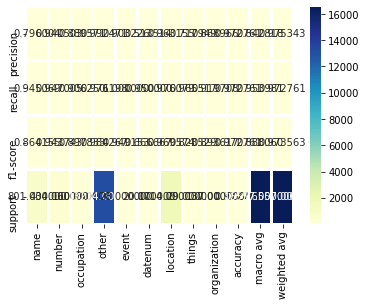

In [ ]:
im=sb.

In [ ]:
def metrics(CF):
  TN=[]
  D=np.diag(CF)
  DS=np.sum(D)
  D_=np.diagflat(D)
  DF=CF-D_
  FP=np.sum(DF,1)
  FN=np.sum(DF,0)
  TP=D
  for i in D:
   TN.append(DS-i)
  A=np.divide(TP+TN,TP+TN+FP+FN)
  P=np.divide(TP,TP+FP)
  R=np.divide(TP,TP+FN)
  F1=np.divide(2*(P * R),(P + R))
  return A,P,R,F1

In [ ]:
import seaborn as sb

In [ ]:
data_

,accuracy,precision,recall,f1score
0,0.985438,0.945069,0.796004,0.864155
1,0.996967,0.947005,0.940503,0.943743
2,0.997955,0.906250,0.889571,0.897833
3,0.974998,0.976198,0.992471,0.984267
4,0.999814,1.000000,0.903226,0.949153
5,0.998822,0.950000,0.513514,0.666667
6,0.993523,0.976079,0.963155,0.969574
7,0.999255,0.965517,0.717949,0.823529
8,0.998141,0.919708,0.868966,0.893617


Metrics from the pretrained model actual implementation of the work is given below

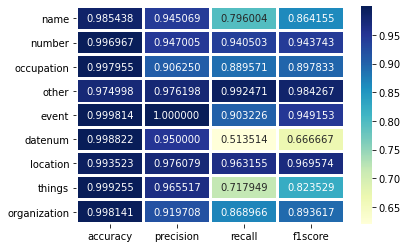

In [ ]:
accuracy,precision,recall,f1score=metrics(CF) #for  running model
CR={'accuracy':accuracy,'precision':precision,'recall':recall,'f1score':f1score}
data_=pd.DataFrame(CR)
#0 Business, 1 sports, 2 Entertainment
newdata=data_.rename(index={0:'name',1:'number',2:'occupation',3:'other',4:'event',5:'datenum',6:'location',7:'things',8:'organization'})
img=sb.heatmap(newdata,annot=True,fmt='f',robust=True,linewidths=2, cmap="YlGnBu")
img.figure.savefig('classification_formalism.png')

In [ ]:
X_train=X[0:75000]
Y_train=y[0:75000]

In [ ]:
test_label=np.hstack(Y_test)

In [ ]:
len(test_label)

537747

In [ ]:
x=[[1,2],[3,4]]

In [ ]:
np.hstack(x)

array([1, 2, 3, 4])

In [ ]:
train_=np.hstack(X_test)

In [ ]:
len(train_)

537747

In [ ]:
test_label[0:10]

array([4, 4, 9, 9, 9, 8, 9, 9, 9, 9], dtype=int32)

In [ ]:
len(X_train)

75000

In [ ]:
from keras.utils import to_categorical
Y_train = [to_categorical(i, num_classes=10) for i in Y_train]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
from keras.models import Model, Input,load_model
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [ ]:
input = Input(shape=(609,))
model = Embedding(input_dim=91173, output_dim=609, input_length=609)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(10, activation="softmax"))(model)  # softmax output layer

In [ ]:
model = Model(input, out)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 609)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 609, 609)          55524357  
_________________________________________________________________
dropout (Dropout)            (None, 609, 609)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 609, 200)          568000    
_________________________________________________________________
time_distributed (TimeDistri (None, 609, 10)           2010      
Total params: 56,094,367
Trainable params: 56,094,367
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import plot_model

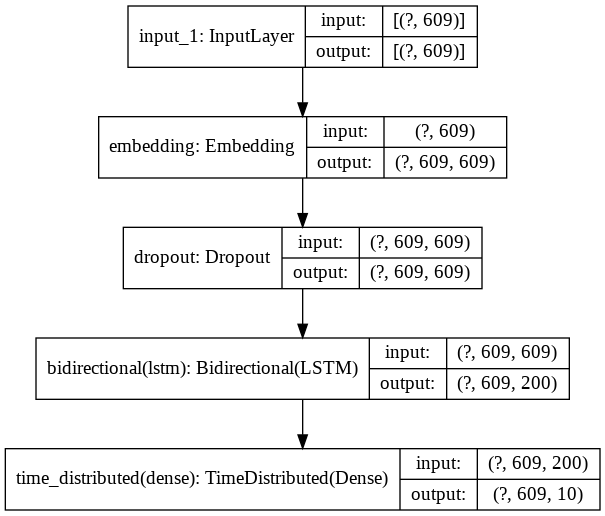

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
Y_train[0].shape

(609, 10)

In [ ]:
history = model.fit(X_train, np.array(Y_train), batch_size=32, epochs=1, validation_split=0.2, verbose=1)

1875/1875 [==============================] - 3766s 2s/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.0028 - val_accuracy: 0.9991


In [ ]:
model.save('/content/drive/MyDrive/Thirdsem/TimeSeries/NER_Hindi.hdf5',model)

In [ ]:
np.save('/content/drive/MyDrive/Thirdsem/TimeSeries/dict.npy',word2idx)

In [ ]:
len(tw_)

12665

In [ ]:
TS=df2.Words.str.cat(sep=' ')
TS=TS.split('newline')
TS=[s.strip() for s in TS]
TS=[s.split(' ') for s in TS]
len(TS)

654

In [ ]:
TS[0]

['उनके',
 'माता',
 '-',
 'पिता',
 'तथा',
 'विस्तृत',
 'परिवार',
 'अर्मीनियाई',
 'था',
 'और',
 'उस',
 'समय',
 'के',
 'उस्मानी',
 'साम्राज्य',
 'के',
 'क्षेत्र',
 'से',
 'अमेरिका',
 'के',
 'कैलिफ़ोर्निया',
 'राज्य',
 'के',
 'फ्रेज़नो',
 'शहर',
 'में',
 'आ',
 'बसा',
 'था',
 '.']

In [ ]:
T = [[new_w2i[w] for w in s] for s in TS]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
np.save('/content/drive/MyDrive/Thirdsem/TimeSeries/testset.npy',allow_pickle=True)

In [ ]:
T=np.load('/content/drive/MyDrive/Thirdsem/TimeSeries/testset.npy',allow_pickle=True)

In [ ]:
Tseq = pad_sequences(maxlen=609, sequences=T, padding="post",value=88696)

In [ ]:
mm=load_model('/content/drive/MyDrive/Thirdsem/TimeSeries/NER_Hindi.hdf5')

In [ ]:
i = 0
p = mm.predict(np.array([Tseq[i]]))
p = np.argmax(p, axis=-1)

In [ ]:
p[0][0:len(T[0])]

array([4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 9, 4, 7, 4, 7, 4, 7, 7,
       4, 4, 7, 4, 4, 4, 4, 4])

The Current Working Repository


In [ ]:
p.shape

(1, 609)

In [ ]:
Tseq.shape

(654, 609)

In [ ]:
#Final_result=[np.argmax(model.predict(np.array(i))[i,0:len(T[])],axis=-1)for i in Tseq]
Final_result=[]
for i in range(0,len(Tseq)):
  p = mm.predict(np.array([Tseq[i]]))
  p = np.argmax(p, axis=-1)
  Final_result.append(p[0][0:len(TS[i])])

In [ ]:
len(Final_result)

654

In [ ]:
Final_result[13]

array([4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
LS=np.hstack(Final_result)

In [ ]:
len(LS)

11578

In [ ]:
LHS=np.hstack(TS)
len(LHS)

11578

In [ ]:
z=zip(LHS,LS)
sol=list(z)

In [ ]:
SUB=pd.DataFrame(sol,names=['Words','Entity'])

TypeError: ignored

In [ ]:
{'': 0,
 'datenum': 6,
 'event': 5,
 'limit': 3,
 'location': 7,
 'name': 0,
 'number': 1,
 'occupation': 2,
 'organization': 9,
 'other': 4,
 'things': 8}

In [ ]:
df_new = SUB.rename(columns={0:'Words',1: 'Entity'})

In [ ]:
df_new.head()

,Words,Entity
0,उनके,4
1,माता,0
2,-,4
3,पिता,0
4,तथा,4


In [ ]:
df.replace({'A': {0: 100, 4: 400}})

In [ ]:
Final_CSV=df_new.replace({'Entity':{0:'name',1:'number',2:'occupation',3:'limit',4:'other',5:'event',6:'datenum',7:'location',8:'things',9:'organization'}})

In [ ]:
Final_CSV.head(20)

,Words,Entity
0,उनके,other
1,माता,name
2,-,other
3,पिता,name
4,तथा,other
5,विस्तृत,other
6,परिवार,name
7,अर्मीनियाई,other
8,था,other
9,और,other


In [ ]:
Final_CSV.to_csv('19015_Task2.csv')

In [ ]:
left=df2.ID

In [ ]:
len(left)

12665

In [ ]:
y_test[16]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
p_=to_categorical(p,num_classes=9)

In [ ]:
p_=p_.reshape(609,9)

In [ ]:
p.shape

(1, 609)

In [ ]:
y_test[16].shape

(609, 9)

In [ ]:
y_test[16].shape

(609, 9)

In [ ]:
print(y_test[14])

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
Num= np.argmax(y_test[12], axis=-1)
Num.shape

(609,)

In [ ]:
p

array([[1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
Num

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
confusion_matrix(p.T,Num)

array([[601,   0,   1],
       [  7,   0,   0],
       [  0,   0,   0]])

In [ ]:
i = 16
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
print("{:14} ({:5}): {}".format("Word", "True", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    print("{:14}: {}".format(words[w],tags.iloc[pred-1].values[0]))

Word           (True ): Pred
भगवत          : other
नस्तालीक़     : other
कीथ           : other
कैलोरा        : location
मुगलों        : other
नैसोफेरिंजाइटिस: location
डिक्लेरेटिव   : location
मुगलों        : other
खगोलविज्ञानी  : other
होटलों        : other
दाला          : location
मुगलों        : other
फ़ार्मास्युटिकल: location
ಥ             : location
नारावारिपल्ली : other
आयुसीमाएं     : other
परपू          : location
चूहे          : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बुधखोला       : other
बु

In [ ]:
tags.pop(-1)

'limit'

In [ ]:
tags

['name',
 'number',
 'other',
 'organization',
 'datenum',
 'things',
 'location',
 'event',
 'occupation']

In [ ]:
sentences_=[]
for i in range(len(ar)):
  w1=ar[i].strip().split(' ')
  w2=Arr[i].strip().split(' ')
  z0=zip(w2,w1)
  par=list(z0)
  sentences_.append(par)

In [ ]:
sentences_[10]

[('वर्ष', 'other'),
 ('1963', 'datenum'),
 ('में', 'other'),
 ('उत्तर', 'location'),
 ('प्रदेश', 'location'),
 ('की', 'other'),
 ('मुख्यमंत्री', 'occupation'),
 ('बनने', 'other'),
 ('से', 'other'),
 ('पहले', 'other'),
 ('वह', 'other'),
 ('लगातार', 'other'),
 ('दो', 'other'),
 ('बार', 'other'),
 ('लोकसभा', 'occupation'),
 ('के', 'other'),
 ('लिए', 'other'),
 ('चुनी', 'other'),
 ('गई', 'other'),
 ('.', 'other')]

In [ ]:
sentences_[100]

[('राष्ट्रीय', 'other'),
 ('महत्व', 'other'),
 ('के', 'other'),
 ('स्मारक', 'other'),
 (',', 'other'),
 ('भारत', 'location'),
 ('में', 'other'),
 ('स्थित', 'other'),
 ('वे', 'other'),
 ('ऐतिहासिक', 'other'),
 (',', 'other'),
 ('प्राचीन', 'other'),
 ('अथवा', 'other'),
 ('पुरातात्विक', 'other'),
 ('संरचनाएं', 'other'),
 (',', 'other'),
 ('स्थल', 'other'),
 ('या', 'other'),
 ('स्थान', 'other'),
 ('हैं', 'other'),
 (',', 'other'),
 ('जोकि', 'other'),
 (',', 'other'),
 ('प्राचीन', 'other'),
 ('संस्मारक', 'other'),
 ('तथा', 'other'),
 ('पुरातत्वीय', 'other'),
 ('स्थल', 'other'),
 ('और', 'other'),
 ('अवशेष', 'other'),
 ('अधिनियम', 'other'),
 (',', 'other'),
 ('1958', 'number'),
 ('किए', 'other'),
 ('अधीन', 'other'),
 (',', 'other'),
 ('भारतीय', 'other'),
 ('पुरातत्व', 'name'),
 ('सर्वेक्षण', 'name'),
 ('के', 'other'),
 ('माध्यम', 'organization'),
 ('से', 'other'),
 ('भारत', 'location'),
 ('की', 'other'),
 ('संघीय', 'other'),
 ('सरकार', 'name'),
 ('या', 'other'),
 ('राज्य', 'location'),
 ('सरक

In [ ]:
np.save('/content/drive/MyDrive/Thirdsem/TimeSeries/neppair.npy',sentences_)

In [ ]:
maxlen = max([len(s) for s in sentences_])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 609


In [ ]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

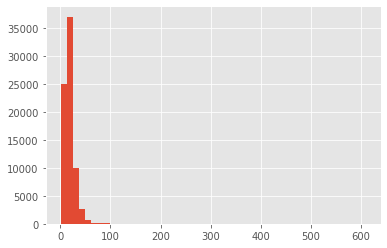

In [ ]:
plt.hist([len(s) for s in sentences_], bins=50)
plt.show()

In [ ]:
words = list(set(data["Name"].values))
words.append("ENDPAD")

In [ ]:
len(words)

87772

In [ ]:
words[1010]

'शाक्त'

In [ ]:
n_words=len(words)
n_words

87772

In [ ]:
tags = list(set(data["Entity"].values))

In [ ]:
n_tags=len(tags)
n_tags

10

In [ ]:
len(a)

19

In [ ]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx['लोकतांत्रिक']

43874

In [ ]:
tag2idx['other']

4

In [ ]:
X = [[word2idx[w[0]] for w in s] for s in sentences_]

KeyError: ignored

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences_]

KeyError: ignored

In [ ]:
X=[]
for s in sentences_:
  for w in s:
   if w[0]!='':
     X.append(word2idx[w[0]])

In [ ]:
len(X)

1460021

In [ ]:
Y=[]
for s in sentences_:
  for w in s:
    if w[1]!='':
      Y.append(tag2idx[w[1]])

In [ ]:
len(Y)

1460021

In [ ]:
y = [[tag2idx[w[1]] for w in s] for s in sentences_]

KeyError: ignored

In [ ]:
X = [[if w([0]!='': word2idx[w[0]] for w in s] for s in sentences]

SyntaxError: ignored

In [ ]:
X_=np.asarray(X)

In [ ]:
X1 = pad_sequences(maxlen=611,sequences=X_, padding="post",value=n_words - 1)

ValueError: ignored

In [ ]:
len(Arr_)

1

In [ ]:
len(ST_)

9377146

In [ ]:
len(ST)

7856086

In [ ]:
ST_[0]

'o'

In [ ]:
A=zip(df.Name,df.Entity)

In [ ]:
Names=df['Name']
Entitys=df['Entity']

In [ ]:
len(Names)

1535904

In [ ]:
len(Entitys)

1535904

In [ ]:
Entitys[1]

'other'

In [ ]:
z_l=zip(Names,Entitys)

In [ ]:
pars=list(z_l)

In [ ]:
len(pars)

1535904

In [ ]:
a=str(pars)

In [ ]:
a_=a.split('('newline','NaN')')

In [ ]:
a=str(pars[1]).join(',')

In [ ]:
pars[1]

('विकेंद्रीकरण', 'other')

In [ ]:
t=str(pars[1])

In [ ]:
t

"('विकेंद्रीकरण', 'other')"

In [ ]:
t.maketrans()

TypeError: ignored

In [ ]:
t_=zip(t)

In [ ]:
t_

In [ ]:
ds=pd.DataFrame(pars)

In [ ]:
ds.head()

,0,1
0,लोकतांत्रिक,other
1,विकेंद्रीकरण,other
2,की,other
3,दिशा,other
4,में,other
